In [6]:
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
class vehicle_ice:
    def __init__(self, name, mpg_hwy, mpg_city, average_override=None):
        self.mpg_hwy = mpg_hwy
        self.mpg_city = mpg_city
        self.name = name
        if average_override != None:
            self.mpg_hwy = average_override
            self.mpg_city = average_override
        
    def get_ave_mpg(self, fract_hwy=.50):
        return fract_hwy*self.mpg_hwy + (1-fract_hwy)*self.mpg_city
    
    
class vehicle_ev:
    def __init__(self, name, kwh_per_mile):
        self.kwh_per_mile = kwh_per_mile
        
    
class vehicle_usage:
    def __init__(self, miles_per_month, fract_hwy):
        self.miles_per_month = miles_per_month
        self.fract_hwy = fract_hwy

        
class elect_tier:
    def __init__(self, start_time, end_time, dollars_per_kwh):
        self.start = start_time
        self.end_time = end_time
        self.dollars_per_kwh = dollars_per_kwh
        
        
class elect_rates:
    def __init__(self):
        self.tiers = list()
    
    def add_tier(self, start_time, end_time, dollars_per_kwh):
        self.tiers.append( elect_tier(start_time,end_time, dollars_per_kwh) )
        
    def get_ave_rate(self):
        
        # TODO: Do the actual average based on usage
        return self.tiers[0].dollars_per_kwh
        
        
def gas_costs_per_month( miles_per_month, gas_dollars_per_gal, miles_per_gallon ):
    ## TODO: generalize so any input parameter can be a vector, and all combos are explored
    ## pass in: 
    ##   miles_per_month, miles_per_gallon: real number
    ##   numpy arrays, 
    ## Return: generate an ndarray
    ##
    dollars_per_month = miles_per_month * gas_dollars_per_gal * (1.0/miles_per_gallon)
    return dollars_per_month

def electr_cost_per_month( miles_per_month, ave_dollars_per_kwh, kwh_per_mile ):
    dollars_per_month = miles_per_month * ave_dollars_per_kwh * kwh_per_mile
    return dollars_per_month

In [28]:
gas_costs = np.linspace(2.00, 5.00, 10)

erates = elect_rates()
erates.add_tier(datetime.time(0), datetime.time(5), 0.17)

miles_per_month = 15000.0/12.0

## Cars
volt = vehicle_ev("Volt 2016", 0.37)
grand_vitara = vehicle_ice("grand vitara", 19, 23, average_override=21)
mazda_3 = vehicle_ice("Mazda 3 2.5l", 28, 39 )

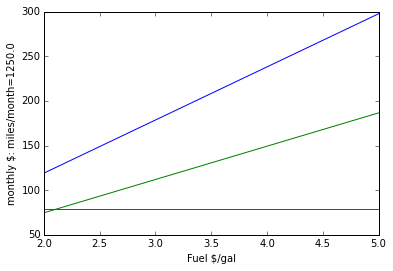

In [29]:
gv_costs_monthly = gas_costs_per_month( miles_per_month, gas_costs, grand_vitara.get_ave_mpg() )
mazda_costs_monthly = gas_costs_per_month( miles_per_month, gas_costs, mazda_3.get_ave_mpg() )
volt_costs_monthly = electr_cost_per_month( miles_per_month, erates.get_ave_rate(), volt.kwh_per_mile )
plt.plot(gas_costs, gv_costs_monthly)
plt.plot(gas_costs, mazda_costs_monthly)
plt.plot(gas_costs, [volt_costs_monthly]*gas_costs.shape[0] )
plt.xlabel("Fuel $/gal")
plt.ylabel("monthly $: miles/month="+str(miles_per_month))
plt.show()